In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, InputLayer, Reshape, BatchNormalization

In [4]:
img_load = ImageDataGenerator(rescale = 1.0 / 255, validation_split = 0.2)
train_data = img_load.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',
                                   target_size = (256, 256), 
                                   batch_size = 32,
                                   subset='training',
                                   color_mode = 'rgb',
                                   class_mode = 'binary')

test_data = img_load.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/',
                                   target_size = (256, 256), 
                                   batch_size = 32,
                                   subset='validation',
                                   color_mode = 'rgb',
                                   class_mode = 'binary')


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


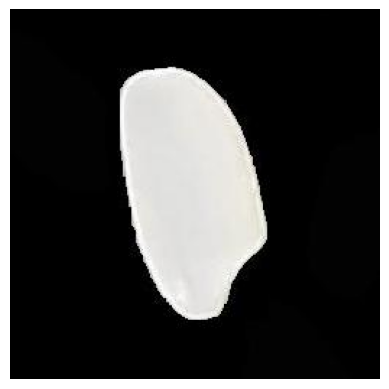

In [5]:
images, labels = next(train_data)
plt.imshow(images[3])
plt.axis('off')
plt.show()

In [7]:
## CNN Model

In [55]:
model = Sequential()
#model.add(InputLayer(input_shape = (256, 256, 3)))
#model.add(Reshape(target_shape = (256, 256, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 5, activation = 'softmax'))
model.add(Dense(units = 1, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy')

In [56]:
history = model.fit(train_data, validation_data = test_data, epochs = 1)

1875/1875 [==============================] - 5480s 3s/step - loss: nan - accuracy: 0.2000 - val_loss: nan - val_accuracy: 0.2000


<Axes: >

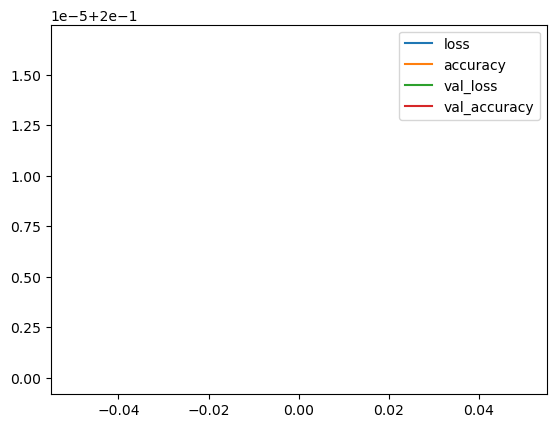

In [57]:
loss = pd.DataFrame(history.history)
loss.plot()

In [58]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, None, None, 32)    896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, None, None, 64)   0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, None, None, 128)

In [59]:
model.evaluate(test_data)

469/469 [==============================] - 320s 682ms/step - loss: nan - accuracy: 0.2000


[nan, 0.20000000298023224]

In [60]:
test_data.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [61]:
test_data.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

1/1 [==============================] - 1s 690ms/step


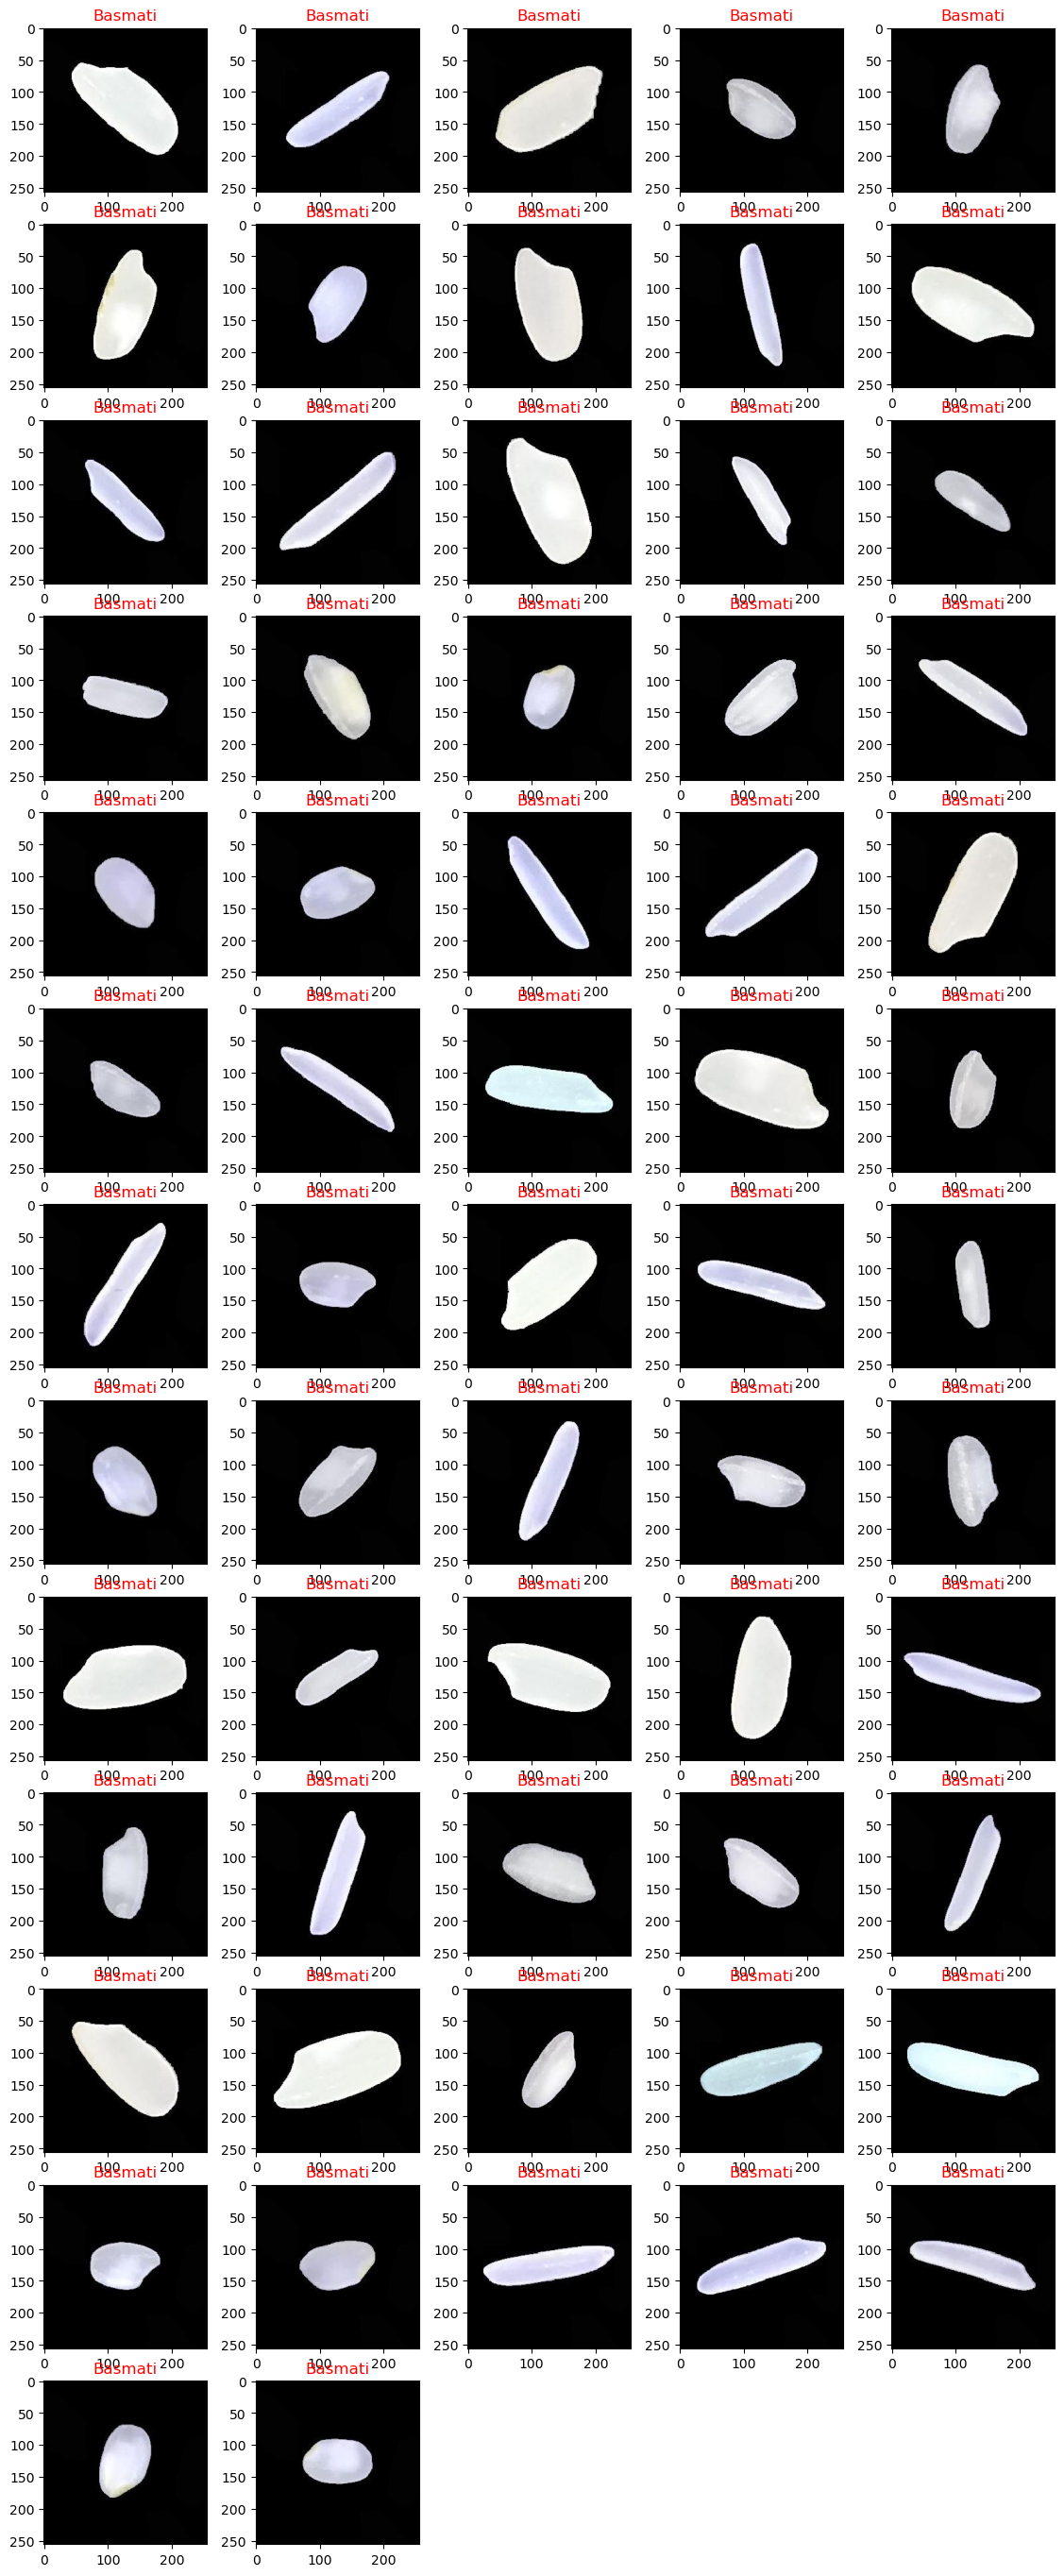

In [62]:
labels_name = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
plt.figure(figsize=(14, 40))
for i in range(4) :
    pred = model.predict(test_data[i][0])
    for j in range(len(pred)) :
        plt.subplot(15, 5, (10*i)+j+1)
        plt.imshow(test_data[i][0][j])
        
        if pred[j] < 0.5 :
            labels_pred = 0

        else :
            labels_pred = 1
            
        if labels_pred == test_data.labels[(10*i) + j] :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'g')
        else :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'r')

In [ ]:
## fit süresi çok uzun olduğu için modelle oynamadım o yüzden başarısı düşük.